In [1]:
import numpy as np 
import pandas as pd
import re
import missingno as msno

Remove unwanted spaces

In [2]:
def clean_text(text):
    if isinstance(text, str): 
        return re.sub(r'\s+', ' ', text).strip()
    return text

In [3]:
metadata = pd.read_excel('../data/metadata/metadata.xlsx', sheet_name=0)

In [4]:
with pd.option_context('display.max_colwidth', 100):

    display(metadata.head())

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Dataset,Unit of measure,Periodicity,...,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Other notes,Notes from original source,Related source links,Other web links,Related indicators,License URL
0,SP.ADO.TFRT,CC BY-4.0,"Adolescent fertility rate (births per 1,000 women ages 15-19)",NaN,"Adolescent fertility rate is the number of births per 1,000 women ages 15-19.","United Nations Population Division, World Population Prospects.",Health: Reproductive health,NaN,NaN,Annual,...,Reproductive health is a state of physical and mental well-being in relation to the reproductive...,NaN,NaN,This is the Sustainable Development Goal indicator 3.7.2 [https://unstats.un.org/sdgs/metadata/].,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licenses#cc-by
1,NV.AGR.TOTL.ZS,CC BY-4.0,"Agriculture, forestry, and fishing, value added (% of GDP)",NaN,"Agriculture, forestry, and fishing corresponds to ISIC divisions 1-3 and includes forestry, hunt...","World Bank national accounts data, and OECD National Accounts data files.",Economic Policy & Debt: National accounts: Shares of GDP & other,NaN,NaN,Annual,...,Gross domestic product (GDP) represents the sum of value added by all its producers. Value added...,NaN,Among the difficulties faced by compilers of national accounts is the extent of unreported econo...,"Note: Data for OECD countries are based on ISIC, revision 4.",NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licenses#cc-by
2,ER.H2O.FWTL.ZS,CC BY-4.0,"Annual freshwater withdrawals, total (% of internal resources)",NaN,"Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses ...","Food and Agriculture Organization, AQUASTAT data.",Environment: Freshwater,NaN,NaN,Annual,...,"Annual freshwater withdrawals are total water withdrawals, not counting evaporation losses from ...","While some countries have an abundant supply of fresh water, others do not have as much. UN esti...",A common perception is that most of the available freshwater resources are visible (on the surfa...,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licenses#cc-by
3,SH.STA.BRTC.ZS,CC BY-4.0,Births attended by skilled health staff (% of total),NaN,Births attended by skilled health staff are the percentage of deliveries attended by personnel t...,"UNICEF, State of the World's Children, Childinfo, and Demographic and Health Surveys.",Health: Reproductive health,NaN,NaN,Annual,...,NaN,Reproductive health is a state of physical and mental well-being in relation to the reproductive...,"For the indicators that are from household surveys, the year refers to the survey year. For more...",Assistance by trained professionals during birth reduces the incidence of maternal deaths during...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licenses#cc-by
4,SP.DYN.CONU.ZS,CC BY-4.0,"Contraceptive prevalence, any method (% of married women ages 15-49)",NaN,"Contraceptive prevalence, any method is the percentage of married women ages 15-49 who are pract...","Household surveys, including Demographic and Health Surveys and Multiple Indicator Cluster Surve...",Health: Reproductive health,NaN,NaN,Annual,...,Contraceptive prevalence rates are obtained mainly from nationally representative household surv...,Contraceptive prevalence among women of reproductive age is related to maternal and child health...,"While the data availability on contraceptive use has increased, in many countries the contracept...",NaN,"As of December 2021, for better consistency the contraceptive prevalence data only for currently...",NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licenses#cc-by


In [5]:
metadata.columns

Index(['Code', 'License Type', 'Indicator Name', 'Short definition',
       'Long definition', 'Source', 'Topic', 'Dataset', 'Unit of measure',
       'Periodicity', 'Base Period', 'Reference period', 'Aggregation method',
       'Statistical concept and methodology', 'Development relevance',
       'Limitations and exceptions', 'General comments', 'Other notes',
       'Notes from original source', 'Related source links', 'Other web links',
       'Related indicators', 'License URL'],
      dtype='object')

In [6]:
metadata.shape

(1496, 23)

In [7]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Code                                 1496 non-null   object
 1   License Type                         1494 non-null   object
 2   Indicator Name                       1496 non-null   object
 3   Short definition                     207 non-null    object
 4   Long definition                      1496 non-null   object
 5   Source                               1495 non-null   object
 6   Topic                                1453 non-null   object
 7   Dataset                              79 non-null     object
 8   Unit of measure                      101 non-null    object
 9   Periodicity                          1471 non-null   object
 10  Base Period                          78 non-null     object
 11  Reference period                     1 non-

# World Bank Indicators Metadata

The metadata file contains several columns describing the indicators. Below is a detailed explanation of each column, followed by the process of extracting the hierarchy from indicator codes and names to categorize the main dataset.

## Key Columns 

- **Code**: A unique identifier for each indicator, consisting of structured abbreviations representing different aspects of the indicator. This column will be used to merge metadata with the main dataset and extract hierarchical information.
- **Indicator Name**: The full descriptive name of the indicator, providing additional context beyond the code.
- **Short Definition**: A concise summary of what the indicator measures, useful for quick reference.
- **Long Definition**: A more detailed explanation of the indicator, including its significance, calculation method, and relevance to policy or research.
- **Topic**: The broad category under which the indicator falls (e.g., Education, Health, Economy). This helps in organizing and classifying the data.
- **Unit of Measure**: Specifies how the indicator values are represented (e.g., percentage, absolute number, GDP in USD).
- **Periodicity**: Indicates how frequently the data is collected or updated (e.g., annual, quarterly, monthly).
- **Source**: The organization or institution that provides the data, ensuring traceability and reliability.
- **Aggregation Method**: Describes how the indicator values are aggregated across different regions or time periods (e.g., average, sum, weighted mean).

## Supporting Columns for Contextual Information

- **Base Period**: A reference point used for calculations in some indicators (e.g., base year for GDP deflation).
- **Reference Period**: Specifies the time frame to which the indicator values apply, sometimes aligning with periodicity.
- **Development Relevance**: Explains the significance of the indicator in global development efforts, such as how it aligns with Sustainable Development Goals (SDGs).
- **Limitations and Exceptions**: Notes any constraints or special considerations regarding the indicator's data quality, coverage, or interpretation.
- **General Comments**: Additional notes or clarifications about the indicator.
- **Other Notes**: Miscellaneous information that may provide further insights.
- **Notes from Original Source**: Any remarks or annotations from the data provider.

## Supplementary Columns for External References

- **Related Indicators**: Lists other indicators that are conceptually or methodologically linked, useful for comparative analysis.
- **Related Source Links**: Provides links to additional resources or datasets related to the indicator.
- **Other Web Links**: Includes external references that might offer more context but are not essential for analysis.

**Our main work here is to work on code and the indicator Name in order to extract hierarchy wich will help us later on when working on the main data of Tunisia**

In [8]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
#     summ['min'] = desc['min'].values
#     summ['max'] = desc['max'].values
    return summ

In [9]:
summary(metadata).style.background_gradient(cmap='Blues')

data shape: (1496, 23)


,data type,#missing,%missing,#unique
Code,object,0,0.000000,1496
License Type,object,2,0.001337,5
Indicator Name,object,0,0.000000,1496
Short definition,object,1289,0.861631,176
Long definition,object,0,0.000000,1130
Source,object,1,0.000668,204
Topic,object,43,0.028743,88
Dataset,object,1417,0.947193,3
Unit of measure,object,1395,0.932487,13
Periodicity,object,25,0.016711,5


Even tho there are columns that have verry high percentage of missing data we will keep them as we will show the non nan values later on in the dashboard 

In [10]:
metadata.duplicated().sum()

0

In [11]:
filtered_columns = {col: list(metadata[col].dropna().unique()) 
                    for col in metadata.columns if metadata[col].nunique(dropna=True) < 30}

unique_values_df = pd.DataFrame([(col, values) for col, values in filtered_columns.items()], 
                                columns=['Feature', 'Unique Values'])
with pd.option_context('display.max_colwidth', 200):

    display(unique_values_df)

,Feature,Unique Values
0,License Type,"[CC BY-4.0, Use and distribution of these data are subject to IEA terms and conditions., Use and distribution of these data are subject to Stockholm International Peace Research Institute (SIPRI) ..."
1,Dataset,"[International Debt Statistics, WDI, Economy]"
2,Unit of measure,"[%, Percentage, Mt CO2eq, t CO2e/capita, kg CO2e per 2021 PPP $, kg CO2e per 2021 constant US$ of GDP, Metric tonnes, Kg per hectare, % of Total, Percent, Hectares, Ratio, 2017 PPP $]"
3,Periodicity,"[Annual, Triennial, Quarterly (represented as Annual), Biennial, Every two years]"
4,Base Period,"[2015, varies by country, 1990, 2010, 2014-16, 2021]"
5,Reference period,[Datasets are incorporated each year from a moving window starting 12 years before the current year (e.g. 2011 for the global MPI in 2023)]
6,Aggregation method,"[Weighted average, Sum, Gap-filled total, Median, Linear mixed-effect model estimates, Unweighted average, Weighted average using 1990 emission levels as weights, Weighted average using population..."
7,Other notes,"[As of December 2021, for better consistency the contraceptive prevalence data only for currently married women or in union are included in this indicator. It means the data for the following cate..."
8,Notes from original source,[SIPRI statistical data on arms transfers relates to actual deliveries of major conventional weapons. To permit comparison between the data on such deliveries of different weapons and to identify ...
9,Related source links,"[World Bank, Poverty and Inequality Platform: https://pip.worldbank.org/, Worldwide Governance Indicators website (https://info.worldbank.org/governance/wgi/)]"


In [12]:
filtered_df = metadata[metadata["Unit of measure"].notna()][["Code","Indicator Name", "Unit of measure"]]

filtered_df

,Code,Indicator Name,Unit of measure
23,SI.DST.FRST.20,Income share held by lowest 20%,%
38,SI.POV.DDAY,Poverty headcount ratio at $2.15 a day (2017 P...,%
39,SI.POV.NAHC,Poverty headcount ratio at national poverty li...,%
41,SH.STA.MALN.ZS,"Prevalence of underweight, weight for age (% o...",%
49,ER.PTD.TOTL.ZS,Terrestrial and marine protected areas (% of t...,Percentage
...,...,...,...
1373,ER.LND.PTLD.ZS,Terrestrial protected areas (% of total land a...,Percentage
1396,EN.GHG.TOT.ZG.AR5,Total greenhouse gas emissions excluding LULUC...,%
1397,EN.GHG.ALL.MT.CE.AR5,Total greenhouse gas emissions excluding LULUC...,Mt CO2eq
1398,EN.GHG.ALL.PC.CE.AR5,Total greenhouse gas emissions per capita excl...,t CO2e/capita


In [13]:
h_metadata = metadata[['Code','Topic', 'Indicator Name']]
h_metadata = h_metadata.rename(columns={'Topic': 'General Topic'})

In [14]:
h_metadata = h_metadata.applymap(clean_text)
h_metadata.head()

,Code,General Topic,Indicator Name
0,SP.ADO.TFRT,Health: Reproductive health,"Adolescent fertility rate (births per 1,000 wo..."
1,NV.AGR.TOTL.ZS,Economic Policy & Debt: National accounts: Sha...,"Agriculture, forestry, and fishing, value adde..."
2,ER.H2O.FWTL.ZS,Environment: Freshwater,"Annual freshwater withdrawals, total (% of int..."
3,SH.STA.BRTC.ZS,Health: Reproductive health,Births attended by skilled health staff (% of ...
4,SP.DYN.CONU.ZS,Health: Reproductive health,"Contraceptive prevalence, any method (% of mar..."


## Extracting Hierarchy

The indicator codes follow a structured format where each segment represents a specific attribute. For example, the indicator **SE.SEC.TCAQ.LO.MA.ZS** can be broken down as follows:

- **SE** → **Sector: Education**  
- **SEC** → **Secondary education level**  
- **TCAQ** → **Completion rate (Total Completion Adjustment Quintile)**  
- **LO** → **Lower secondary**  
- **MA** → **Male**  
- **ZS** → **Percentage (% of total students)**  

This means the indicator represents the **completion rate in lower secondary education for males, expressed as a percentage**.

### Extracting Hierarchy from General Topic:
To determine the hierarchy, we will extract information from the **General Topic** column, which follows a structured format like **XX:XX:XX**. In this structure:  

- The first part represents the **Topic**  
- The second part represents the **SubTopic1**  
- The third part represents the **SubTopic2** (if available)  

By parsing this structure, we can derive meaningful categorizations from the **General Topic** directly.

### Utilizing WDI Documentation:
In addition to extracting hierarchy from the General Topic, we will also utilize **WDI documentation** to validate, refine, and complete missing values. This will allow us to:

1. **Extract hierarchy from General Topic** by splitting it into structured categories.  
2. **Compare with the WDI documentation** to verify the classification.  
3. **Fill missing values** in the extracted hierarchy using official WDI descriptions.  
4. **Ensure consistency and accuracy** by cross-referencing extracted data with predefined classifications in the metadata.  
5. **Refine category mappings** to align with meaningful classifications for analysis.  

This approach ensures a structured and systematic classification of indicators while handling inconsistencies or missing classifications effectively.


In [15]:
wdi = pd.read_excel('../data/WDI_Indicators.xlsx', sheet_name="WDI series")
wdi_codes = pd.read_excel('../data/WDI_Indicators.xlsx', sheet_name="Coding")

In [16]:
wdi_codes.head()

,Topic,Topic description,General subject,General subject description,Specific subject,Specific subject description,Extensions,Extensions description
0,AG,Agriculture,ACS,Access,0003,Age 0-3,05,2005 (PPP)
1,BG,Balance of payments: gross,ADJ,Adjusted savings,0004,Age 0-4,10,Decile
2,BM,"Balance of payments: imports, payments (credit)",ADM,Admission,0014,Age 0-14,14,Age 0-14
3,BN,Balance of payments: net,ADO,Adolescent,0324,Age 0-24,20,Quintile
4,BX,"Balance of payments: exports, receipts (debit)",ADT,Adult,0306,Age 3-6,90,% changes since 1990


## This sheet can be helpfull later as it devides the code into parts and give the description of each part


In [17]:
wdi = wdi.applymap(clean_text)

wdi.head()

,Series Code,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors",Environment,Agricultural production,NaN,NaN
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,Environment,Agricultural production,NaN,NaN
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,Environment,Agricultural production,NaN,NaN
3,AG.LND.AGRI.K2,Agricultural land (sq. km),Environment,Land use,NaN,NaN
4,AG.LND.AGRI.ZS,Agricultural land (% of land area),Environment,Land use,NaN,NaN


## This is similar to the General topic values but its devided

In [18]:
wdi = wdi.rename(columns={'Series Code': 'Code'})

In [19]:
wdi_metadata = pd.merge(h_metadata, wdi, on='Code', how='left')

wdi_metadata

,Code,General Topic,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
0,SP.ADO.TFRT,Health: Reproductive health,"Adolescent fertility rate (births per 1,000 wo...","Adolescent fertility rate (births per 1,000 wo...",Health,Reproductive health,NaN,NaN
1,NV.AGR.TOTL.ZS,Economic Policy & Debt: National accounts: Sha...,"Agriculture, forestry, and fishing, value adde...","Agriculture, value added (% of GDP)",Economic Policy & Debt,National accounts,Shares of GDP & other,NaN
2,ER.H2O.FWTL.ZS,Environment: Freshwater,"Annual freshwater withdrawals, total (% of int...","Annual freshwater withdrawals, total (% of int...",Environment,Freshwater,NaN,NaN
3,SH.STA.BRTC.ZS,Health: Reproductive health,Births attended by skilled health staff (% of ...,Births attended by skilled health staff (% of ...,Health,Reproductive health,NaN,NaN
4,SP.DYN.CONU.ZS,Health: Reproductive health,"Contraceptive prevalence, any method (% of mar...","Contraceptive prevalence, any methods (% of wo...",Health,Reproductive health,NaN,NaN
...,...,...,...,...,...,...,...,...
1491,SG.VAW.REFU.ZS,Gender: Health,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Gender,Health,NaN,NaN
1492,SP.M15.2024.FE.ZS,Gender: Agency,Women who were first married by age 15 (% of w...,NaN,NaN,NaN,NaN,NaN
1493,SP.M18.2024.FE.ZS,Gender: Agency,Women who were first married by age 18 (% of w...,Women who were first married by age 18 (% of w...,Health,Population,Dynamics,NaN
1494,SH.DYN.AIDS.FE.ZS,Health: Risk factors,Women's share of population ages 15+ living wi...,Women's share of population ages 15+ living wi...,Health,Risk factors,NaN,NaN


## Extracting Hierarchy from Indicator Names and WDI data

When analyzing the `General Topic` column of the metadata, we can observe a common pattern that helps in **categorizing the indicators**:

### **Pattern Observation**
Each indicator name follows this format:  
`Main Category : Specific Topic :  Specific Topic2`

Examples:
- **SG.VAW.REFU.ZS** → `Gender: Health`
- **SP.M15.2024.FE.ZS** → `Gender: Agency`
- **SP.M18.2024.FE.ZS** → `Gender: Agency`

From this, we can see that the part **before** the colon (`:`) represents the **main category**, and the part **after** represents the **specific topic**.  

### **Grouping Strategy**
Using this structure, we can extract:
1. **Main Category** (before `:`) → Helps in broad classification.
2. **Subcategory/Specification** (after `:`) → Provides finer details.

### **Next Steps**
- Apply a script to **split** the indicator names into `Main Category` and `Subcategory`.
- Focus on the WDI data to extract hierarchy and also look into the the `Main Category` and `Subcategory` if there are missing data or for comparison reasons. 
- Use these categories to **group the data** and create structured reports.


## As shwon previously there some General topics with nan values and the same of the WDI DATA we should firsty address those

<Axes: >

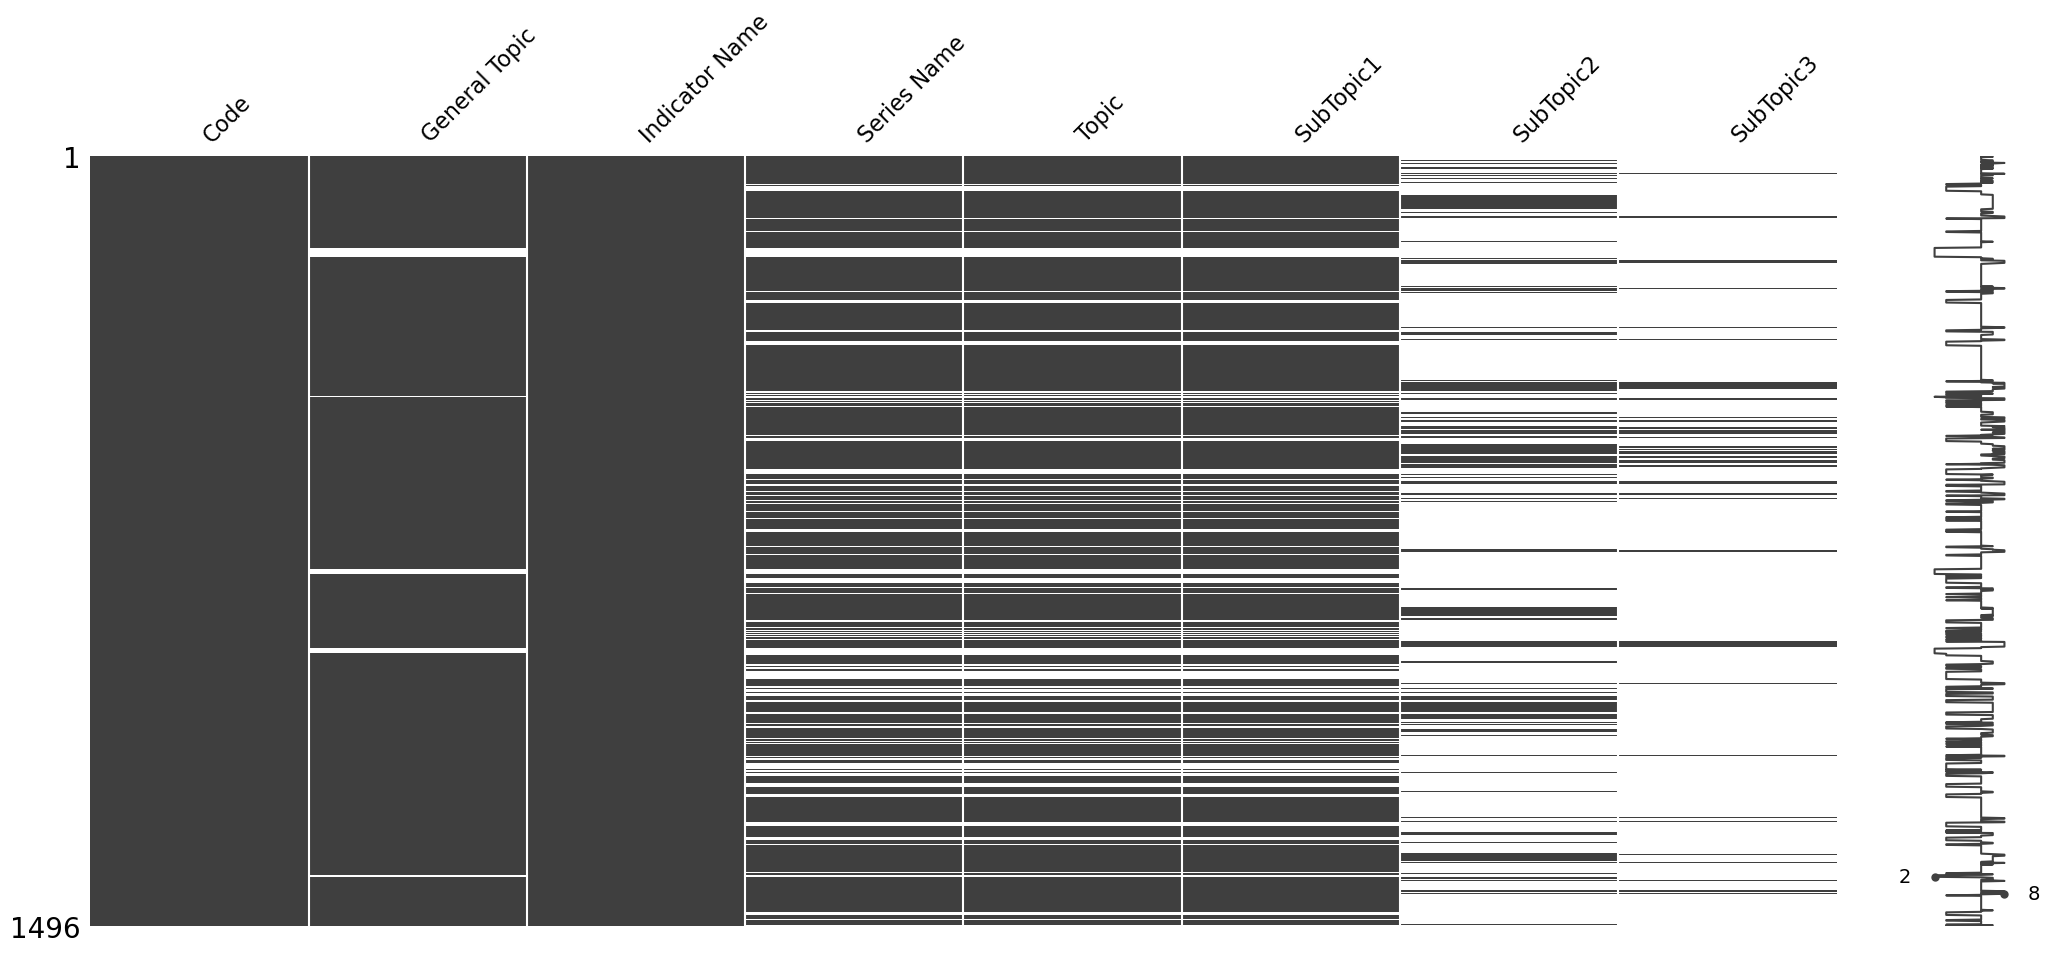

In [20]:
msno.matrix(wdi_metadata)

## Handling Missing Data in WDI and Metadata

### Observations:
1. **Missing General Topic in Metadata:**  
   - When the **General Topic** is missing in the metadata, all other related features from the WDI dataset also appear to be missing.  


2. **Missing Data Points in WDI:**  
    - This wont be a problem as our focus is on extracting the parts from `General Topic` and then if there are missing parts we address them

### Our Focus:
- **Missing General Topics**, this must be addressed by looking into other sources of data or other columns like the `description` or looking into other similar codes with the same patter and that has no nan values in the topics in order to create our hierarchy.   
- **Look for any difference on topic names between the metadata and the WDI Data and handle them**

## Missing General Topic in Metadata :
Identify rows where 'General Topic' is missing

Check if all columns in WDI are also missing for these indicators

In [21]:
missing_gt = wdi_metadata[wdi_metadata['General Topic'].isna()]

cols_to_check = ['Series Name', 'Topic']
missing_check = missing_gt[cols_to_check].isna().all(axis=1)

if missing_check.all():
    print("All WDI column have also null values")
else:
    print("Some rows have values ")

All WDI column have also null values


In [22]:
missing_gt.head()

,Code,General Topic,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
178,EN.GHG.CO2.ZG.AR5,NaN,Carbon dioxide (CO2) emissions (total) excludi...,NaN,NaN,NaN,NaN,NaN
179,EN.GHG.CO2.MT.CE.AR5,NaN,Carbon dioxide (CO2) emissions (total) excludi...,NaN,NaN,NaN,NaN,NaN
180,EN.GHG.CO2.PC.CE.AR5,NaN,Carbon dioxide (CO2) emissions excluding LULUC...,NaN,NaN,NaN,NaN,NaN
181,EN.GHG.CO2.AG.MT.CE.AR5,NaN,Carbon dioxide (CO2) emissions from Agricultur...,NaN,NaN,NaN,NaN,NaN
182,EN.GHG.CO2.BU.MT.CE.AR5,NaN,Carbon dioxide (CO2) emissions from Building (...,NaN,NaN,NaN,NaN,NaN


In [23]:
missing_prefixes = {
    "Part 1": missing_gt['Code'].str.split('.').str[0].unique(),
    "Part 2": missing_gt['Code'].str.split('.').str[1].unique(),
    "Part 3": missing_gt['Code'].str.split('.').str[2].unique(),

}

# Print results and check which ones have only one unique value
for part, values in missing_prefixes.items():
    print(f"{part}: {values}")


Part 1: ['EN']
Part 2: ['GHG']
Part 3: ['CO2' 'FGAS' 'CH4' 'N2O' 'TOT' 'ALL']


#### When analyzing the data, we found that all Series Name and Topic values are missing when `General Topic` is NaN. Additionally, an important observation is that in cases where `General Topic` is missing, the code always starts with `EN.GHG`. 

### Therefore, to address this issue, we will focus specifically on codes of the form `EN.GHG.xx`.

In [24]:
# missing_series_name = wdi_metadata[wdi_metadata['Series Name'].isna()]

# cols_to_check = ['Series Name', 'Topic', 'SubTopic1']
# missing_check = missing_series_name[cols_to_check].isna().all(axis=1)

# if missing_check.all():
#     print("All 'Series Name', 'Topic', and 'SubTopic1' values are missing when 'Series Name' is NaN.")
# else:
#     print("Some rows have values in 'Topic' or 'SubTopic1' even when 'Series Name' is NaN.")

In [25]:
# missing_series_name.tail(20)

In [26]:
# missing_prefixes_all = missing_series_name['Code'].str.split('.').str[0].unique()

# print(missing_prefixes_all)

In [27]:
# example = wdi_metadata[wdi_metadata['Code'].str.startswith('SH.STA')]
# example.reset_index(inplace = True,drop= True)
# example

In [28]:
# example[['General Topic','SubTopic1']].iloc[11]

## Conclusion

Our analysis confirmed two key findings regarding missing values:

1. **When 'General Topic' is missing in the metadata, all related WDI columns ('Series Code', 'Series Name', 'Topic', etc.) are also missing.**  

    **NB:** We found that when the General Topic and all other WDI data are missing, the codes always start with EN.GHG.
   - This suggests that these indicators are either incomplete or not classified under any specific topic.
   

2. **There is sometimes a mismatch between WDI topic names and Metadata topic names.**


## Handling Missing Data in WDI and Metadata

### Proposed Solutions for Imputation

To address these missing values, we propose the following strategies:

   - Utilize the **indicator code** description to infer relevant categories.
   - Cross-reference with other indicators that have similar codes but are not missing.



### For example 

From the observed pattern, we can define an initial assumption for topic grouping:
- **EN.GHG.CH4** → Possibly related to CH4 emissions.
- **EN.GHG.N2O** → Could indicate N2O-related data.
- **EN.GHG.ALL** → Appears to represent an aggregated measure.
- **EN.GHG.IP, EN.GHG.PI, EN.GHG.TR** → May correspond to different sources or sectors.

Further analysis of indicator names will help refine and confirm these groupings.

In [29]:
en_ghg_missing= metadata[metadata['Topic'].isna() & metadata['Code'].str.startswith("EN.GHG")]

en_ghg_missing = en_ghg_missing[['Code', 'Indicator Name','Long definition']]
with pd.option_context('display.max_colwidth', None):
    display(en_ghg_missing)

,Code,Indicator Name,Long definition
178,EN.GHG.CO2.ZG.AR5,Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),"Change of emissions (as %) of current year with respect to emissions in baseline year 1990 emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5). Negative values indicate that the emission level for that year is lower than the emissions level in 1990."
179,EN.GHG.CO2.MT.CE.AR5,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),"A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5)."
180,EN.GHG.CO2.PC.CE.AR5,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"Total annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF, standardized to carbon dioxide equivalent values divided by the economy's population. This measure excludes GHG fluxes caused by Land Use Change Land Use and Forestry (LULUCF), as these fluxes have larger uncertainties."
181,EN.GHG.CO2.AG.MT.CE.AR5,Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e),"A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the agricultural sector. This includes emissions from livestock (IPCC 2006 codes 3.A.1 (enteric fermentation, 3.a.2 (manure management) and crops (IPCC 2006 codes 3.C.1 Emissions from biomass burning, 3.C.2 Liming, 3.C.3 Urea application, 3.C.4 Direct N2O Emissions from managed soils, 3.C.5 Indirect N2O Emissions from managed soils, 3.C.6 Indirect N2O Emissions from manure management, 3.C.7 Rice cultivations). The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5)."
182,EN.GHG.CO2.BU.MT.CE.AR5,Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e),"A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the building sector (subsector of the energy sector) including IPCC 2006 codes 1.A.4 Residential and other sectors, 1.A.5 Non-Specified. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5)."
183,EN.GHG.CO2.FE.MT.CE.AR5,Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e),"A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from fugitive emissions (subsector of the energy sector) including IPCC 2006 codes 1.A.1.bc Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries, 1.B.1 Solid Fuels, 1.B.2 Oil and Natural Gas, 5.B. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5)."
184,EN.GHG.CO2.IC.MT.CE.AR5,Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e),"A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from industrial combustion (subsector of the energy sector) including IPCC 2006 code 1.A.2 Manufacturing Industries and Construction. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5)."
185,EN.GHG.CO2.IP.MT.CE.AR5,Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e),"A measure of annual em

### Assigning General Topic for Missing EN.GHG Codes

After analyzing the definitions and general context of the dataset, we observed that all missing `EN.GHG` codes relate to environmental data, specifically **greenhouse gas emissions**. 

To ensure consistency, we will assign the following value to the `General Topic` column for all missing `EN.GHG` entries:

**"Environment: Greenhouse Gas Emissions"**  

This step helps to fill in missing metadata while maintaining logical coherence with existing data.


In [30]:
wdi_metadata.loc[wdi_metadata['Code'].str.startswith('EN.GHG') & wdi_metadata['General Topic'].isna(), 
                 'General Topic'] = "Environment: Greenhouse Gas Emissions"


In [31]:
wdi_metadata[wdi_metadata['Code'].str.startswith("EN.GHG")]

,Code,General Topic,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
178,EN.GHG.CO2.ZG.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions (total) excludi...,NaN,NaN,NaN,NaN,NaN
179,EN.GHG.CO2.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions (total) excludi...,NaN,NaN,NaN,NaN,NaN
180,EN.GHG.CO2.PC.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions excluding LULUC...,NaN,NaN,NaN,NaN,NaN
181,EN.GHG.CO2.AG.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions from Agricultur...,NaN,NaN,NaN,NaN,NaN
182,EN.GHG.CO2.BU.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions from Building (...,NaN,NaN,NaN,NaN,NaN
183,EN.GHG.CO2.FE.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions from Fugitive E...,NaN,NaN,NaN,NaN,NaN
184,EN.GHG.CO2.IC.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions from Industrial...,NaN,NaN,NaN,NaN,NaN
185,EN.GHG.CO2.IP.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions from Industrial...,NaN,NaN,NaN,NaN,NaN
186,EN.GHG.CO2.PI.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions from Power Indu...,NaN,NaN,NaN,NaN,NaN
187,EN.GHG.CO2.TR.MT.CE.AR5,Environment: Greenhouse Gas Emissions,Carbon dioxide (CO2) emissions from Transport ...,NaN,NaN,NaN,NaN,NaN


<Axes: >

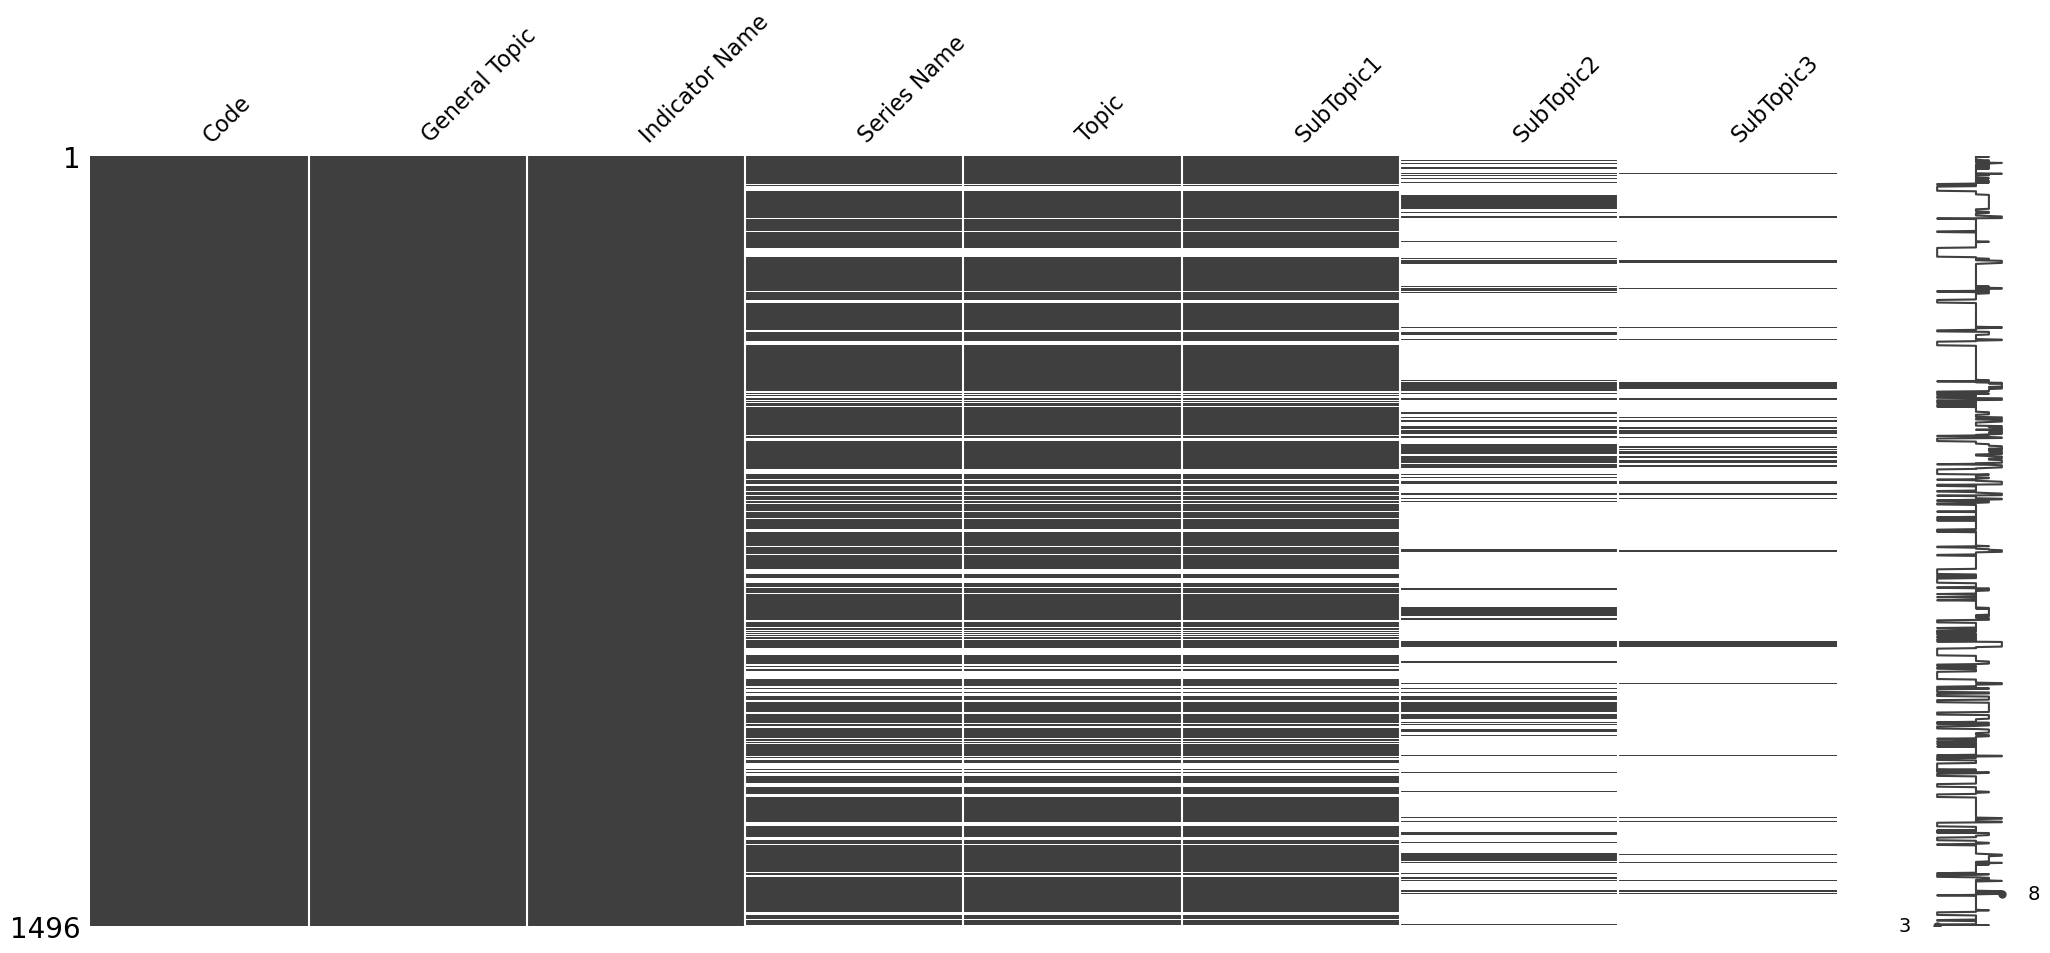

In [32]:
msno.matrix(wdi_metadata)

## Now that there is no missing `General Topic` we should focus on deviding the general topic into two columns similar to WDI data where we have `Topic`and `SubTopic1`and `SubTopicN`



We noticed also that sometimes there is a mismatch between the general topic second part after the ':' and the subTopic1 so we must address it before imputation

In [33]:
chpoint = wdi_metadata.copy()


In [34]:
# wdi_metadata = chpoint.copy()

In [35]:
colon_counts = wdi_metadata['General Topic'].str.count(':')

for count in colon_counts.unique():
    matching_rows = wdi_metadata[colon_counts == count]['General Topic']
    
    print(f"Count of {count} ':' {len(matching_rows)} instances")
    print(matching_rows.iloc[1])  
    print('-' * 40) 


Count of 1 ':' 1079 instances
Environment: Freshwater
----------------------------------------
Count of 2 ':' 250 instances
Economic Policy & Debt: National accounts: Shares of GDP & other
----------------------------------------
Count of 3 ':' 134 instances
Economic Policy & Debt: Balance of payments: Current account: Transfers
----------------------------------------
Count of 0 ':' 33 instances
Trade
----------------------------------------


In [36]:
wdi_metadata[['Metadata Topic', 'Metadata SubTopic1', 'Metadata SubTopic2', 'Metadata SubTopic3']] = wdi_metadata['General Topic'].str.split(':', n=3, expand=True).apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#wdi_metadata.drop(columns=['General Topic'], inplace=True)

cols = ['Code', 'General Topic', 'Metadata Topic', 'Metadata SubTopic1', 'Metadata SubTopic2', 'Metadata SubTopic3'] + [col for col in wdi_metadata.columns if col not in ['Code','General Topic', 'Metadata Topic', 'Metadata SubTopic1', 'Metadata SubTopic2', 'Metadata SubTopic3']]
wdi_metadata = wdi_metadata[cols]

wdi_metadata


,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
0,SP.ADO.TFRT,Health: Reproductive health,Health,Reproductive health,None,None,"Adolescent fertility rate (births per 1,000 wo...","Adolescent fertility rate (births per 1,000 wo...",Health,Reproductive health,NaN,NaN
1,NV.AGR.TOTL.ZS,Economic Policy & Debt: National accounts: Sha...,Economic Policy & Debt,National accounts,Shares of GDP & other,None,"Agriculture, forestry, and fishing, value adde...","Agriculture, value added (% of GDP)",Economic Policy & Debt,National accounts,Shares of GDP & other,NaN
2,ER.H2O.FWTL.ZS,Environment: Freshwater,Environment,Freshwater,None,None,"Annual freshwater withdrawals, total (% of int...","Annual freshwater withdrawals, total (% of int...",Environment,Freshwater,NaN,NaN
3,SH.STA.BRTC.ZS,Health: Reproductive health,Health,Reproductive health,None,None,Births attended by skilled health staff (% of ...,Births attended by skilled health staff (% of ...,Health,Reproductive health,NaN,NaN
4,SP.DYN.CONU.ZS,Health: Reproductive health,Health,Reproductive health,None,None,"Contraceptive prevalence, any method (% of mar...","Contraceptive prevalence, any methods (% of wo...",Health,Reproductive health,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,SG.VAW.REFU.ZS,Gender: Health,Gender,Health,None,None,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Gender,Health,NaN,NaN
1492,SP.M15.2024.FE.ZS,Gender: Agency,Gender,Agency,None,None,Women who were first married by age 15 (% of w...,NaN,NaN,NaN,NaN,NaN
1493,SP.M18.2024.FE.ZS,Gender: Agency,Gender,Agency,None,None,Women who were first married by age 18 (% of w...,Women who were first married by age 18 (% of w...,Health,Population,Dynamics,NaN
1494,SH.DYN.AIDS.FE.ZS,Health: Risk factors,Health,Risk factors,None,None,Women's share of population ages 15+ living wi...,Women's share of population ages 15+ living wi...,Health,Risk factors,NaN,NaN


In [37]:
wdi_metadata = wdi_metadata.applymap(clean_text)

In [38]:
missing_values = wdi_metadata[['Metadata Topic', 'Metadata SubTopic1', 'Metadata SubTopic2', 'Metadata SubTopic3']].isna().sum()

print(missing_values)

Metadata Topic           0
Metadata SubTopic1      33
Metadata SubTopic2    1112
Metadata SubTopic3    1362
dtype: int64


<Axes: >

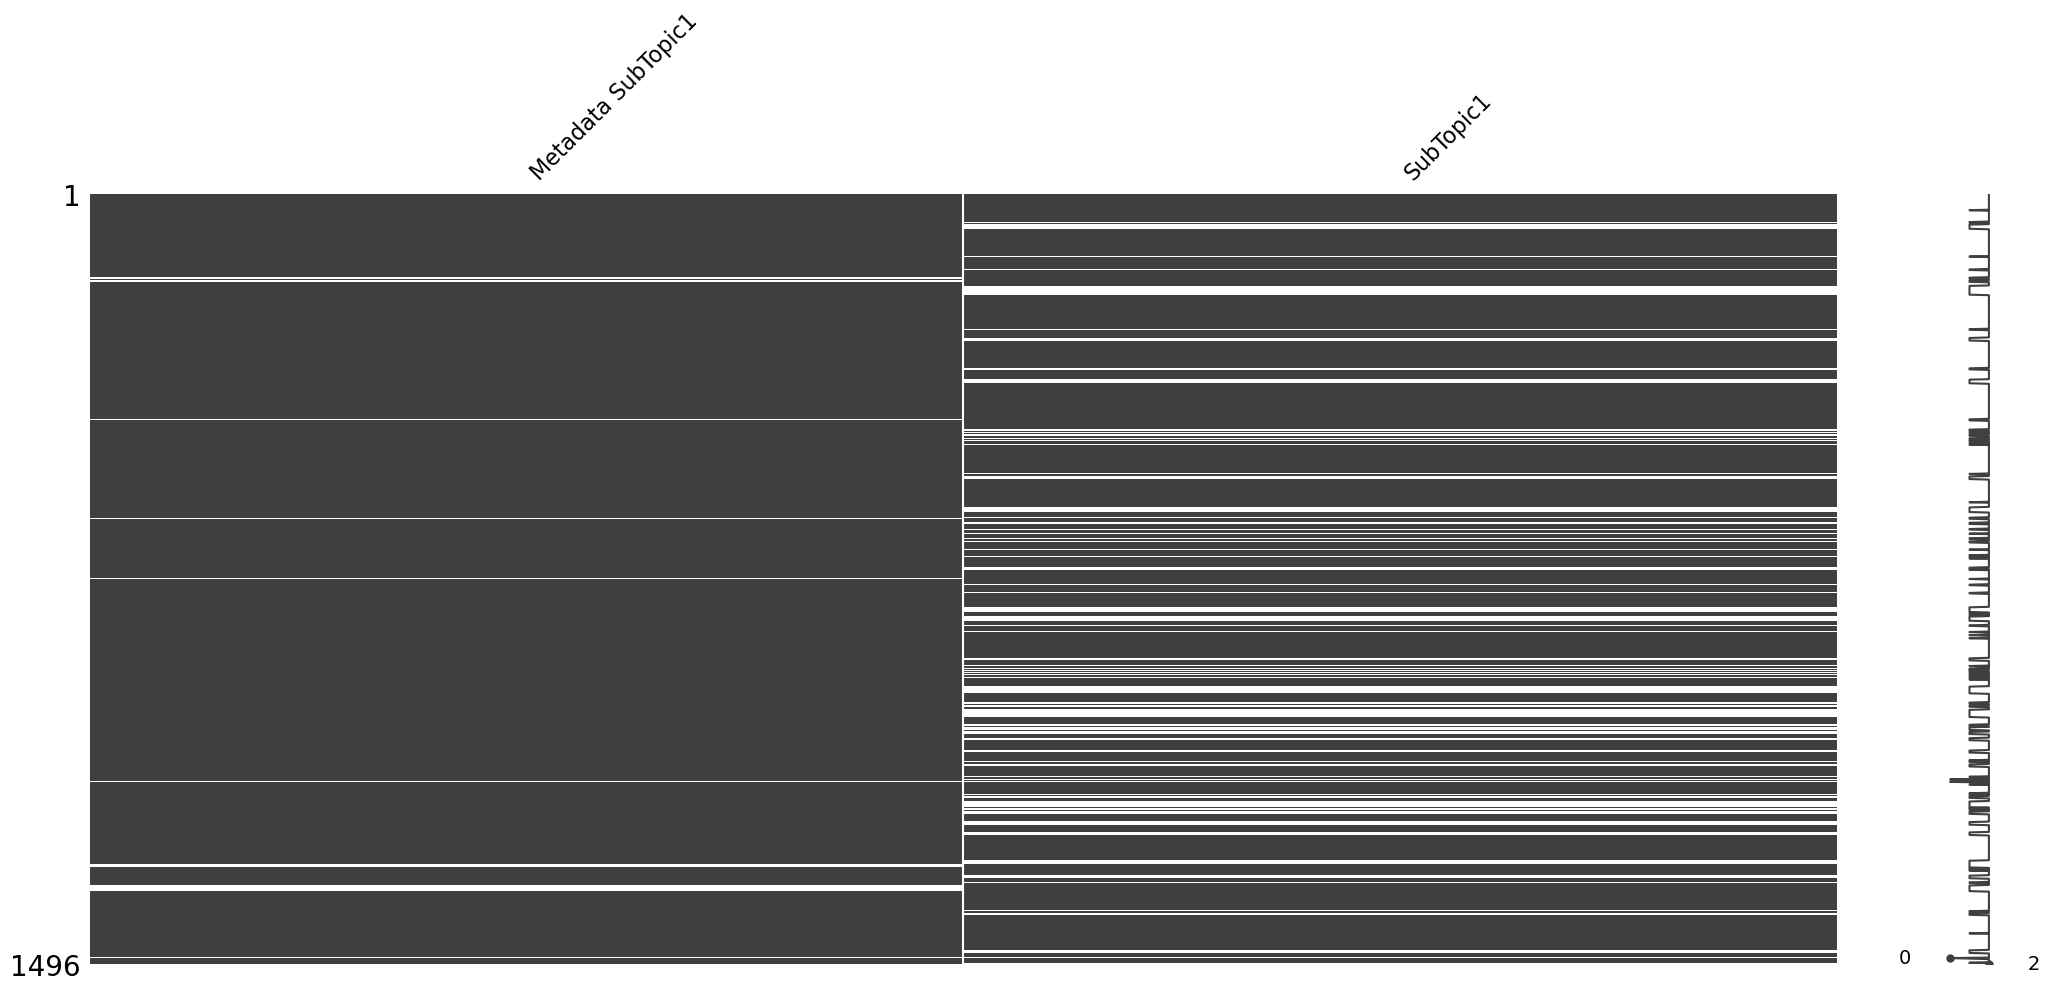

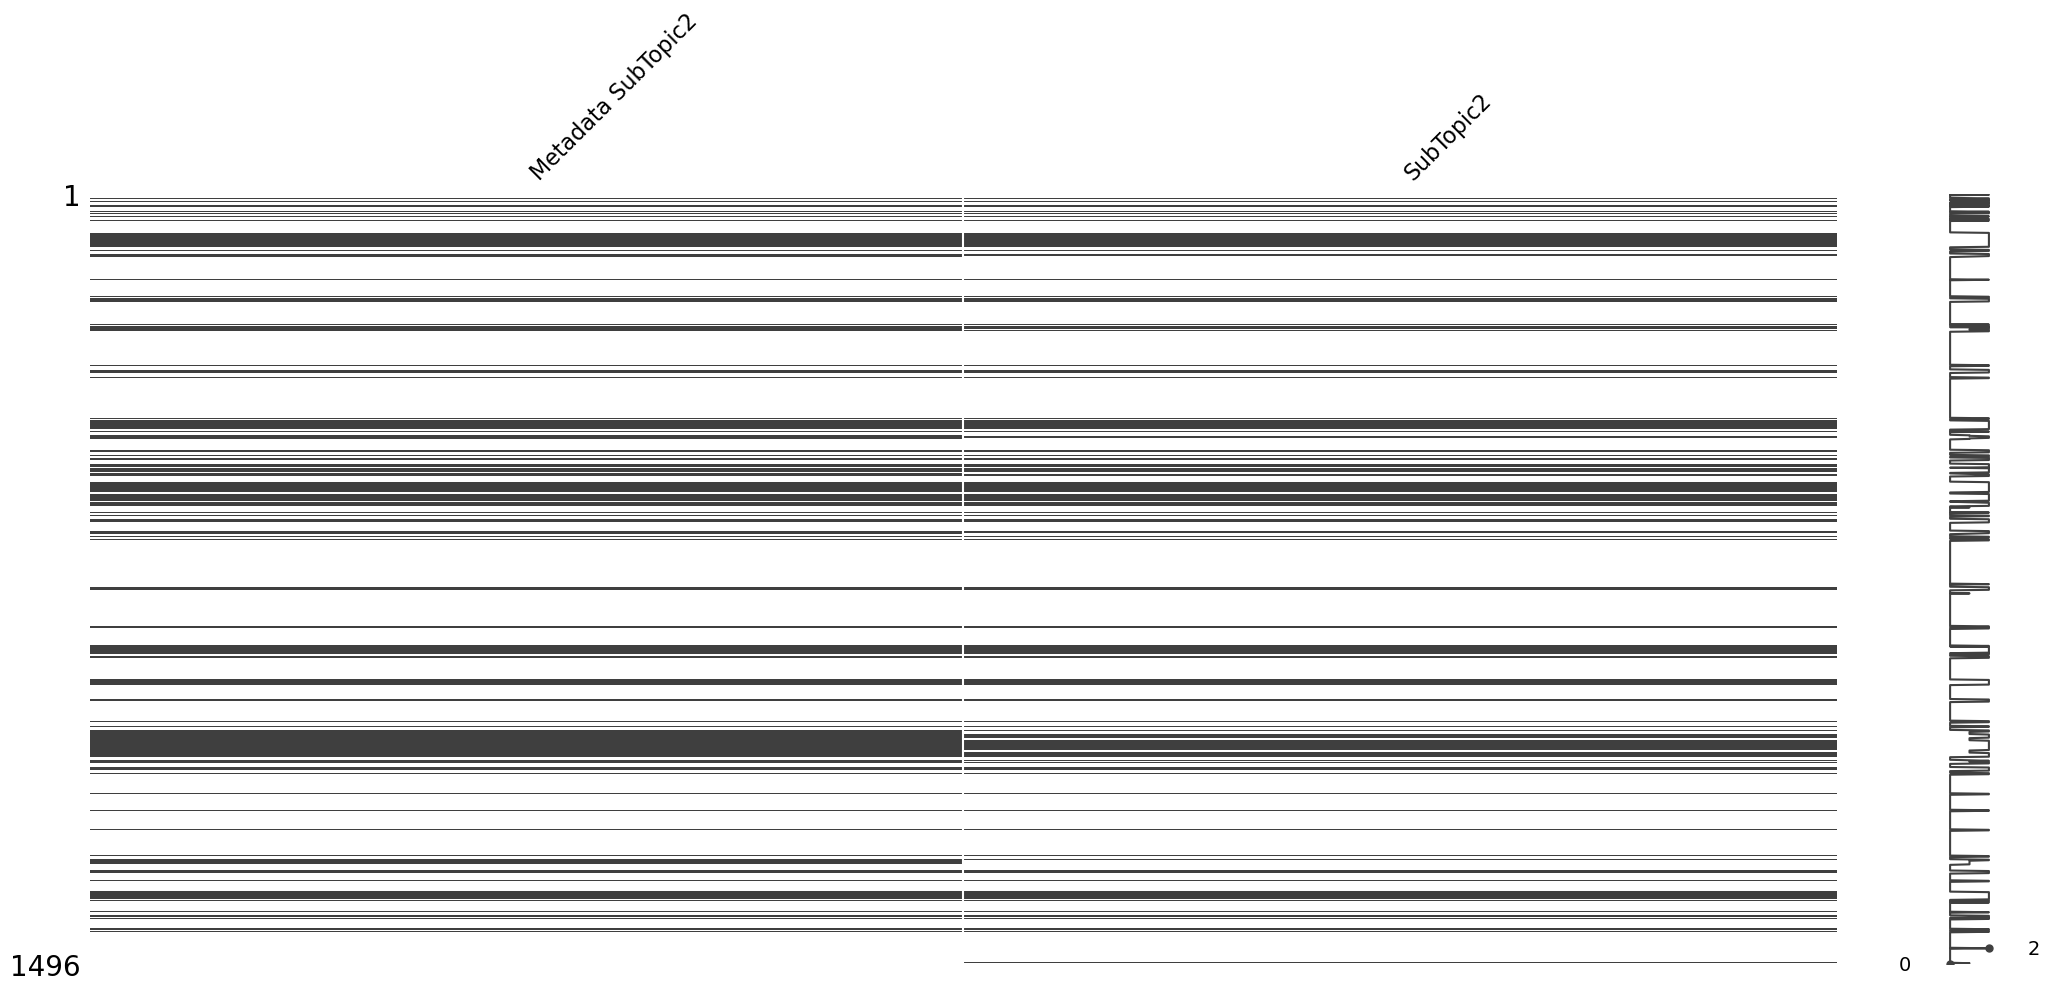

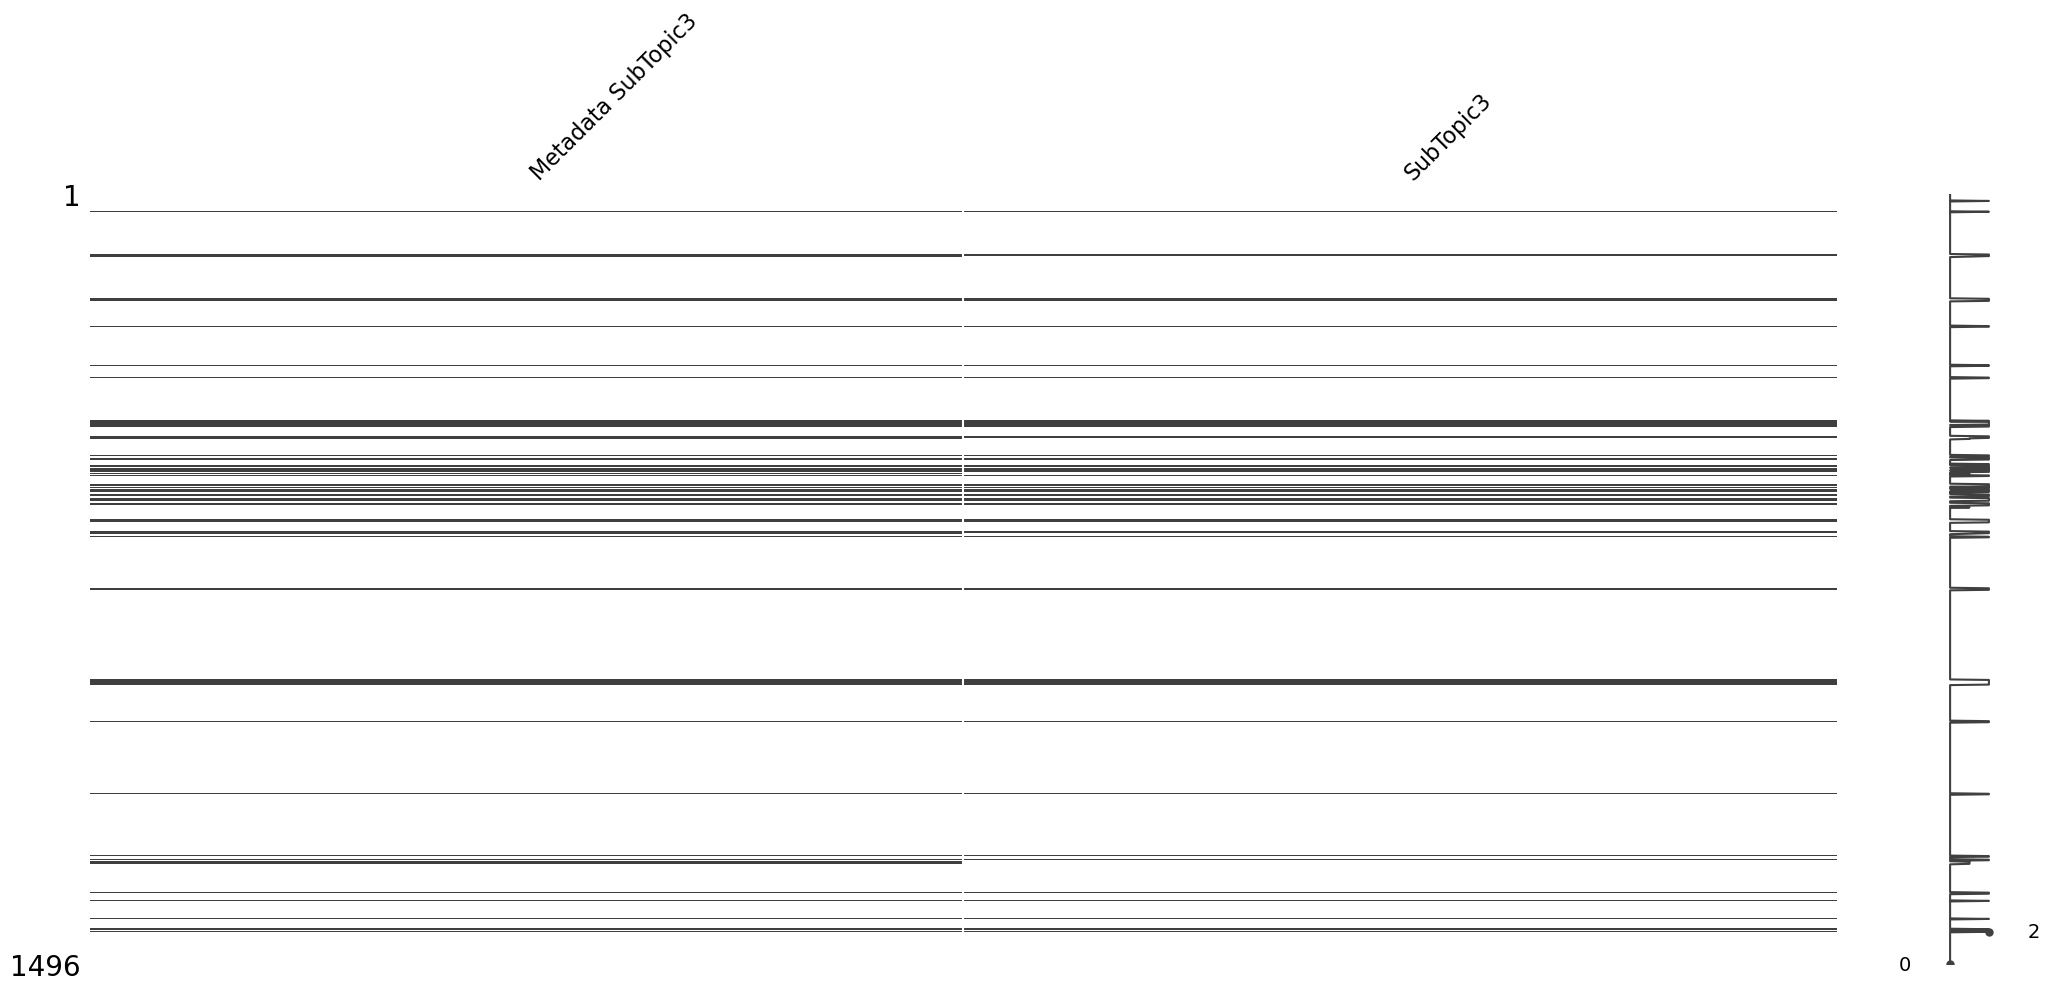

In [39]:
msno.matrix(wdi_metadata[['Metadata SubTopic1', 'SubTopic1']])

msno.matrix(wdi_metadata[['Metadata SubTopic2', 'SubTopic2']])

msno.matrix(wdi_metadata[['Metadata SubTopic3', 'SubTopic3']])


**Handling Missing Metadata SubTopic1**  

As we can see, there are missing values in **Metadata SubTopic1**. We should impute them either by using the value from **SubTopic1** or by looking for similar non-null values.  

Additionally, we do not need to focus on the missing values in the other columns, as they can remain null when the hierarchy does not extend that far.  


In [40]:
missing_metadata_subtopic1 = wdi_metadata[wdi_metadata['Metadata SubTopic1'].isna() & wdi_metadata['SubTopic1'].notna()]
missing_metadata_subtopic1

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
31,TT.PRI.MRCH.XD.WD,Trade,Trade,None,None,None,Net barter terms of trade index (2015 = 100),Net barter terms of trade index (2000 = 100),Private Sector & Trade,Trade indexes,NaN,NaN
162,TM.TAX.MRCH.BC.ZS,Trade,Trade,None,None,None,"Binding coverage, all products (%)","Binding coverage, all products (%)",Private Sector & Trade,Tariffs,NaN,NaN
163,TM.TAX.MANF.BC.ZS,Trade,Trade,None,None,None,"Binding coverage, manufactured products (%)","Binding coverage, manufactured products (%)",Private Sector & Trade,Tariffs,NaN,NaN
164,TM.TAX.TCOM.BC.ZS,Trade,Trade,None,None,None,"Binding coverage, primary products (%)","Binding coverage, primary products (%)",Private Sector & Trade,Tariffs,NaN,NaN
168,TM.TAX.MRCH.BR.ZS,Trade,Trade,None,None,None,"Bound rate, simple mean, all products (%)","Bound rate, simple mean, all products (%)",Private Sector & Trade,Tariffs,NaN,NaN
169,TM.TAX.MANF.BR.ZS,Trade,Trade,None,None,None,"Bound rate, simple mean, manufactured products...","Bound rate, simple mean, manufactured products...",Private Sector & Trade,Tariffs,NaN,NaN
170,TM.TAX.TCOM.BR.ZS,Trade,Trade,None,None,None,"Bound rate, simple mean, primary products (%)","Bound rate, simple mean, primary products (%)",Private Sector & Trade,Tariffs,NaN,NaN
438,TX.VAL.MRCH.XD.WD,Trade,Trade,None,None,None,Export value index (2015 = 100),Export value index (2000 = 100),Private Sector & Trade,Trade indexes,NaN,NaN
439,TX.QTY.MRCH.XD.WD,Trade,Trade,None,None,None,Export volume index (2015 = 100),Export volume index (2000 = 100),Private Sector & Trade,Trade indexes,NaN,NaN
629,TM.VAL.MRCH.XD.WD,Trade,Trade,None,None,None,Import value index (2015 = 100),Import value index (2000 = 100),Private Sector & Trade,Trade indexes,NaN,NaN


In [41]:
wdi_metadata.loc[wdi_metadata['Metadata SubTopic1'].isna() & wdi_metadata['SubTopic1'].notna(), 'SubTopic1'].unique()


array(['Trade indexes', 'Tariffs', 'Trade facilitation'], dtype=object)

In [42]:
wdi_metadata['Metadata SubTopic1'] = wdi_metadata['Metadata SubTopic1'].fillna(wdi_metadata['SubTopic1'])

**Now we adress missing `Metadata SubTopic1` with also missing `SubTopic1`**

In [43]:
null_rows = wdi_metadata[wdi_metadata['Metadata SubTopic1'].isna()]
null_rows

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
1136,SN.ITK.MSFI.ZS,Health,Health,NaN,None,None,Prevalence of moderate or severe food insecuri...,NaN,NaN,NaN,NaN,NaN
1141,SN.ITK.SVFI.ZS,Health,Health,NaN,None,None,Prevalence of severe food insecurity in the po...,NaN,NaN,NaN,NaN,NaN
1483,SG.LAW.INDX,Employment and Time Use,Employment and Time Use,NaN,None,None,Women Business and the Law Index Score (scale ...,NaN,NaN,NaN,NaN,NaN


In [44]:
SN = wdi_metadata[wdi_metadata['Code'].str.startswith('SN')]
SN

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
273,SN.ITK.SALT.ZS,Health: Nutrition,Health,Nutrition,None,None,Consumption of iodized salt (% of households),Consumption of iodized salt (% of households),Health,Nutrition,NaN,NaN
1136,SN.ITK.MSFI.ZS,Health,Health,NaN,None,None,Prevalence of moderate or severe food insecuri...,NaN,NaN,NaN,NaN,NaN
1141,SN.ITK.SVFI.ZS,Health,Health,NaN,None,None,Prevalence of severe food insecurity in the po...,NaN,NaN,NaN,NaN,NaN
1149,SN.ITK.DEFC.ZS,Health: Nutrition,Health,Nutrition,None,None,Prevalence of undernourishment (% of population),Prevalence of undernourishment (% of population),Health,Nutrition,NaN,NaN
1467,SN.ITK.VITA.ZS,Health: Nutrition,Health,Nutrition,None,None,Vitamin A supplementation coverage rate (% of ...,Vitamin A supplementation coverage rate (% of ...,Health,Nutrition,NaN,NaN


**It's obvious here we should replace those missing values with `Nutrition`**

In [45]:
wdi_metadata.loc[wdi_metadata['Code'].str.startswith('SN') & wdi_metadata['Metadata SubTopic1'].isna(), ['General Topic','Metadata SubTopic1']] = ['Health: Nutrition','Nutrition']

In [46]:
SG = wdi_metadata[wdi_metadata['Code'].str.startswith('SG')]
SG

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
1191,SG.GEN.PARL.ZS,Gender: Public life & decision making,Gender,Public life & decision making,None,None,Proportion of seats held by women in national ...,Proportion of seats held by women in national ...,Gender,Public life & decision making,NaN,NaN
1192,SG.TIM.UWRK.FE,Gender: Participation & access,Gender,Participation & access,None,None,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN,NaN,NaN
1193,SG.TIM.UWRK.MA,Gender: Participation & access,Gender,Participation & access,None,None,Proportion of time spent on unpaid domestic an...,NaN,NaN,NaN,NaN,NaN
1194,SG.VAW.1549.ZS,Gender: Health,Gender,Health,None,None,Proportion of women subjected to physical and/...,Proportion of women subjected to physical and/...,Gender,Health,NaN,NaN
1483,SG.LAW.INDX,Employment and Time Use,Employment and Time Use,NaN,None,None,Women Business and the Law Index Score (scale ...,NaN,NaN,NaN,NaN,NaN
1484,SG.DMK.SRCR.FN.ZS,Gender: Public life & decision making,Gender,Public life & decision making,None,None,Women making their own informed decisions rega...,NaN,NaN,NaN,NaN,NaN
1485,SG.DMK.ALLD.FN.ZS,Gender: Public life & decision making,Gender,Public life & decision making,None,None,Women participating in the three decisions (ow...,Women participating in the three decisions (ow...,Gender,Public life & decision making,NaN,NaN
1486,SG.VAW.REAS.ZS,Gender: Health,Gender,Health,None,None,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Gender,Health,NaN,NaN
1487,SG.VAW.ARGU.ZS,Gender: Health,Gender,Health,None,None,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Gender,Health,NaN,NaN
1488,SG.VAW.BURN.ZS,Gender: Health,Gender,Health,None,None,Women who believe a husband is justified in be...,Women who believe a husband is justified in be...,Gender,Health,NaN,NaN


**It's obvious here we should replace those missing values with `Public life & decision making` and also replace the metada Topic with `Gender`**

In [47]:
wdi_metadata.loc[wdi_metadata['Code'] == 'SG.LAW.INDX', ['General Topic','Metadata Topic', 'Metadata SubTopic1']] = ['Gender: Public life & decision making','Gender', 'Public life & decision making']


<Axes: >

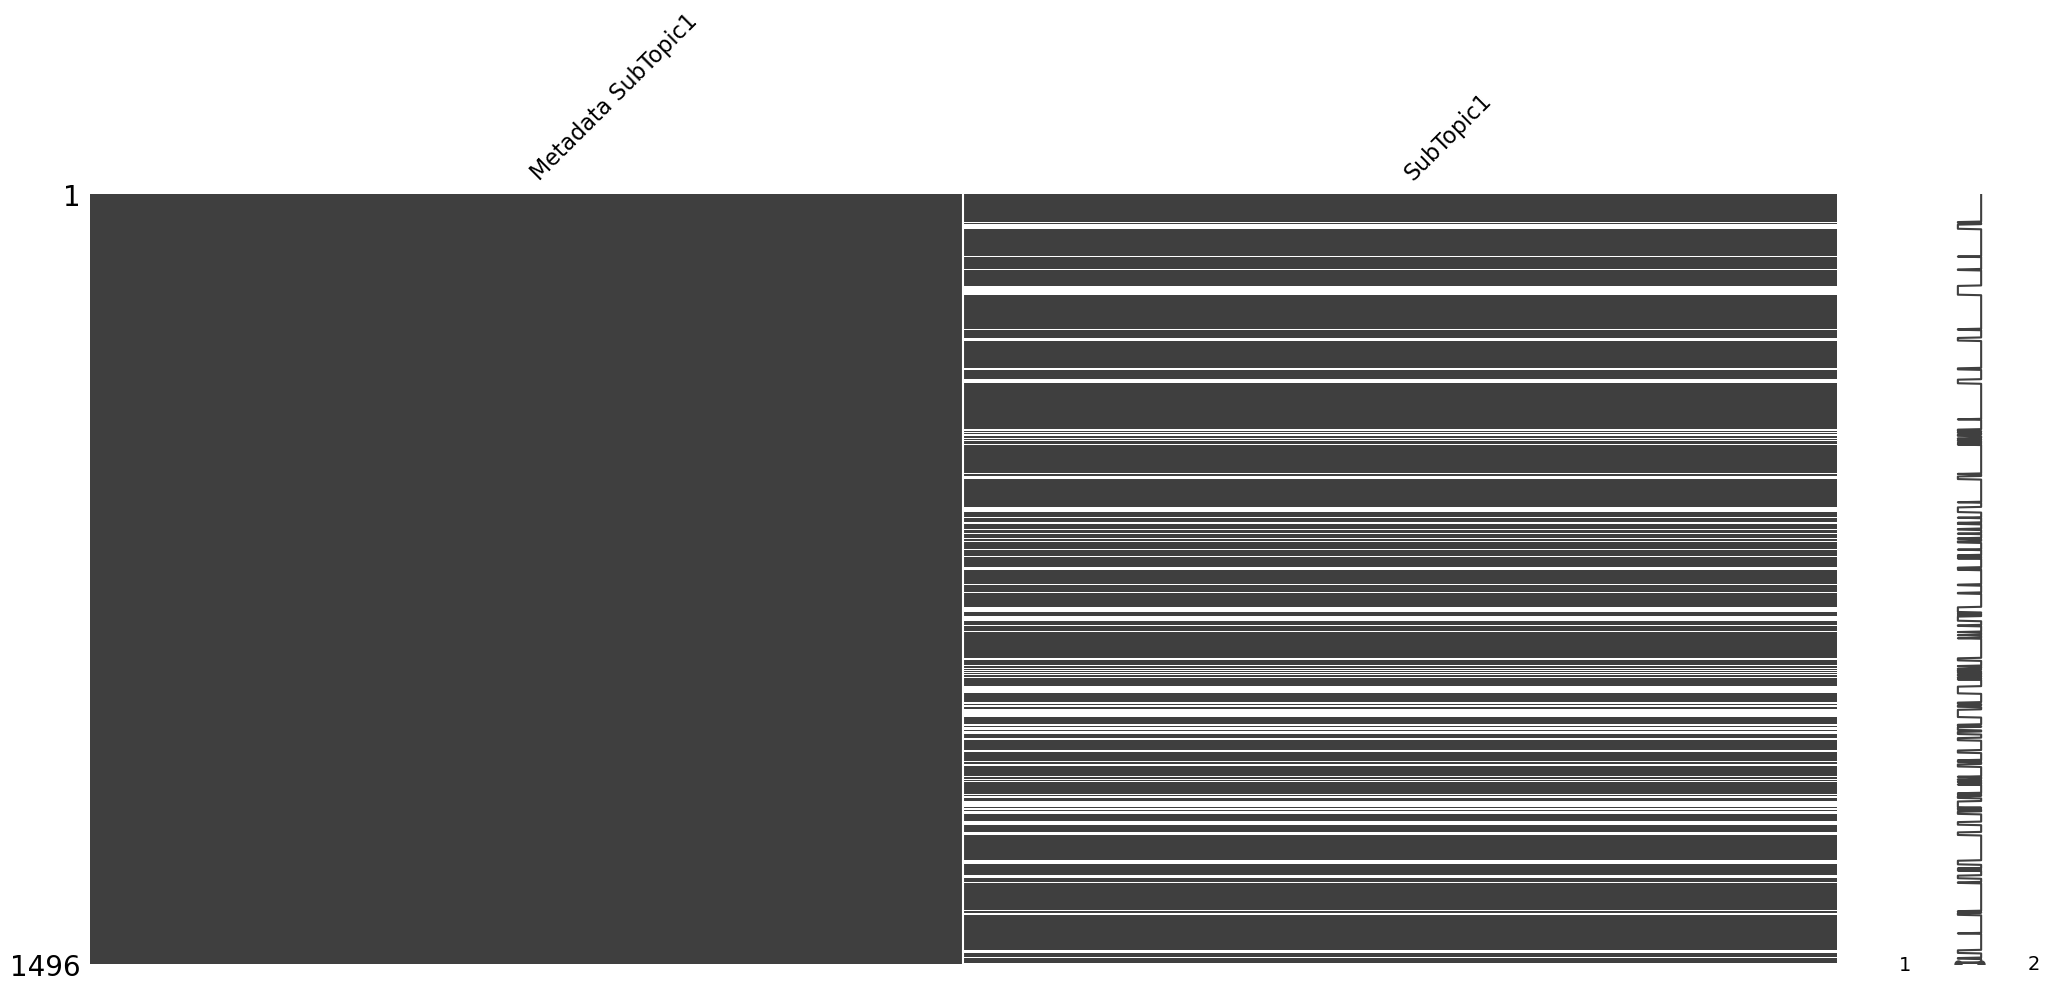

In [48]:
msno.matrix(wdi_metadata[['Metadata SubTopic1', 'SubTopic1']])

In [49]:
missing_metadata_subtopic2 = wdi_metadata[wdi_metadata['Metadata SubTopic2'].isna() & wdi_metadata['SubTopic2'].notna()]
missing_metadata_subtopic2

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
1493,SP.M18.2024.FE.ZS,Gender: Agency,Gender,Agency,None,None,Women who were first married by age 18 (% of w...,Women who were first married by age 18 (% of w...,Health,Population,Dynamics,NaN


## We should also address topics that appear very infrequently in the dataset, as they don't provide meaningful information for hierarchy. One way to handle them is by replacing these rare topics with similar, more frequent topics.


In [50]:
few_Metadata_Topic = wdi_metadata[wdi_metadata['Metadata Topic'].isin(wdi_metadata['Metadata Topic'].value_counts()[wdi_metadata['Metadata Topic'].value_counts() < 5].index)]

few_Metadata_SubTopic1 = wdi_metadata.groupby('Metadata Topic')['Metadata SubTopic1'].apply(lambda x: x[x.map(x.value_counts()) == 1]).reset_index()



In [51]:
few_Metadata_Topic

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3


In [52]:
few_Metadata_SubTopic1

,Metadata Topic,level_1,Metadata SubTopic1
0,Private Sector & Trade,27,Total merchandise trade
1,Trade,747,Trade facilitation


In [53]:
wdi_metadata[wdi_metadata['Metadata SubTopic1'] == 'Trade facilitation']

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
288,IC.EXP.CSBC.CD,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,"Cost to export, border compliance (US$)","Cost to export, border compliance (US$)",Private Sector & Trade,Trade facilitation,NaN,NaN
289,IC.EXP.CSDC.CD,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,"Cost to export, documentary compliance (US$)","Cost to export, documentary compliance (US$)",Private Sector & Trade,Trade facilitation,NaN,NaN
290,IC.IMP.CSBC.CD,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,"Cost to import, border compliance (US$)","Cost to import, border compliance (US$)",Private Sector & Trade,Trade facilitation,NaN,NaN
291,IC.IMP.CSDC.CD,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,"Cost to import, documentary compliance (US$)","Cost to import, documentary compliance (US$)",Private Sector & Trade,Trade facilitation,NaN,NaN
723,LP.EXP.DURS.MD,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,"Lead time to export, median case (days)","Lead time to export, median case (days)",Private Sector & Trade,Trade facilitation,NaN,NaN
724,LP.IMP.DURS.MD,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,"Lead time to import, median case (days)","Lead time to import, median case (days)",Private Sector & Trade,Trade facilitation,NaN,NaN
744,LP.LPI.TRAC.XQ,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,Logistics performance index: Ability to track ...,Logistics performance index: Ability to track ...,Private Sector & Trade,Trade facilitation,NaN,NaN
745,LP.LPI.LOGS.XQ,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,Logistics performance index: Competence and qu...,Logistics performance index: Competence and qu...,Private Sector & Trade,Trade facilitation,NaN,NaN
746,LP.LPI.ITRN.XQ,Private Sector & Trade: Trade facilitation,Private Sector & Trade,Trade facilitation,None,None,Logistics performance index: Ease of arranging...,Logistics performance index: Ease of arranging...,Private Sector & Trade,Trade facilitation,NaN,NaN
747,LP.LPI.CUST.XQ,Trade,Trade,Trade facilitation,None,None,Logistics performance index: Efficiency of cus...,Logistics performance index: Efficiency of cus...,Private Sector & Trade,Trade facilitation,NaN,NaN


In [54]:
wdi_metadata.loc[wdi_metadata['Code'] == 'LP.LPI.CUST.XQ', 'Metadata Topic'] = 'Private Sector & Trade'

In [55]:
wdi_metadata[wdi_metadata['Metadata SubTopic1'] == 'Total merchandise trade']

,Code,General Topic,Metadata Topic,Metadata SubTopic1,Metadata SubTopic2,Metadata SubTopic3,Indicator Name,Series Name,Topic,SubTopic1,SubTopic2,SubTopic3
27,TG.VAL.TOTL.GD.ZS,Private Sector & Trade: Total merchandise trade,Private Sector & Trade,Total merchandise trade,None,None,Merchandise trade (% of GDP),Merchandise trade (% of GDP),Private Sector & Trade,Total merchandise trade,NaN,NaN


## There are no topics with fewer than 5 occurrences, so no further handling is required for them.


In [56]:
df_clean = wdi_metadata[['Code','Indicator Name', 'General Topic', 'Metadata Topic', 'Metadata SubTopic1', 'Metadata SubTopic2', 'Metadata SubTopic3']]
df_clean = df_clean.rename(columns={
    'Metadata Topic': 'Topic',
    'Metadata SubTopic1': 'SubTopic1',
    'Metadata SubTopic2': 'SubTopic2',
    'Metadata SubTopic3': 'SubTopic3'
})


In [57]:
df_clean = df_clean.sort_values(by='Topic', ascending=True)


In [58]:
summary(df_clean).style.background_gradient(cmap='Blues')

data shape: (1496, 7)


,data type,#missing,%missing,#unique
Code,object,0,0.000000,1496
Indicator Name,object,0,0.000000,1496
General Topic,object,0,0.000000,87
Topic,object,0,0.000000,12
SubTopic1,object,0,0.000000,61
SubTopic2,object,1112,0.743316,20
SubTopic3,object,1362,0.910428,7


In [59]:
df_clean.head()

,Code,Indicator Name,General Topic,Topic,SubTopic1,SubTopic2,SubTopic3
440,NY.EXP.CAPM.KN,Exports as a capacity to import (constant LCU),Economic Policy & Debt: National accounts: Loc...,Economic Policy & Debt,National accounts,Local currency at constant prices,Other items
567,NY.GDY.TOTL.KN,Gross domestic income (constant LCU),Economic Policy & Debt: National accounts: Loc...,Economic Policy & Debt,National accounts,Local currency at constant prices,Other items
566,NE.GDI.TOTL.CD,Gross capital formation (current US$),Economic Policy & Debt: National accounts: US$...,Economic Policy & Debt,National accounts,US$ at current prices,Expenditure on GDP
565,NE.GDI.TOTL.CN,Gross capital formation (current LCU),Economic Policy & Debt: National accounts: Loc...,Economic Policy & Debt,National accounts,Local currency at current prices,Expenditure on GDP
564,NE.GDI.TOTL.KN,Gross capital formation (constant LCU),Economic Policy & Debt: National accounts: Loc...,Economic Policy & Debt,National accounts,Local currency at constant prices,Expenditure on GDP


In [60]:
metadata

,Code,License Type,Indicator Name,Short definition,Long definition,Source,Topic,Dataset,Unit of measure,Periodicity,...,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Other notes,Notes from original source,Related source links,Other web links,Related indicators,License URL
0,SP.ADO.TFRT,CC BY-4.0,"Adolescent fertility rate (births per 1,000 wo...",NaN,Adolescent fertility rate is the number of bir...,"United Nations Population Division, World Popu...",Health: Reproductive health,NaN,NaN,Annual,...,Reproductive health is a state of physical and...,NaN,NaN,This is the Sustainable Development Goal indic...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1,NV.AGR.TOTL.ZS,CC BY-4.0,"Agriculture, forestry, and fishing, value adde...",NaN,"Agriculture, forestry, and fishing corresponds...","World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Sha...,NaN,NaN,Annual,...,Gross domestic product (GDP) represents the su...,NaN,Among the difficulties faced by compilers of n...,Note: Data for OECD countries are based on ISI...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
2,ER.H2O.FWTL.ZS,CC BY-4.0,"Annual freshwater withdrawals, total (% of int...",NaN,Annual freshwater withdrawals refer to total w...,"Food and Agriculture Organization, AQUASTAT data.",Environment: Freshwater,NaN,NaN,Annual,...,Annual freshwater withdrawals are total water ...,While some countries have an abundant supply o...,A common perception is that most of the availa...,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
3,SH.STA.BRTC.ZS,CC BY-4.0,Births attended by skilled health staff (% of ...,NaN,Births attended by skilled health staff are th...,"UNICEF, State of the World's Children, Childin...",Health: Reproductive health,NaN,NaN,Annual,...,NaN,Reproductive health is a state of physical and...,For the indicators that are from household sur...,Assistance by trained professionals during bir...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
4,SP.DYN.CONU.ZS,CC BY-4.0,"Contraceptive prevalence, any method (% of mar...",NaN,"Contraceptive prevalence, any method is the pe...","Household surveys, including Demographic and H...",Health: Reproductive health,NaN,NaN,Annual,...,Contraceptive prevalence rates are obtained ma...,Contraceptive prevalence among women of reprod...,While the data availability on contraceptive u...,NaN,"As of December 2021, for better consistency th...",NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,SG.VAW.REFU.ZS,CC BY-4.0,Women who believe a husband is justified in be...,NaN,Percentage of women ages 15-49 who believe a h...,"Demographic and Health Surveys (DHS), Multiple...",Gender: Health,NaN,NaN,Annual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1492,SP.M15.2024.FE.ZS,CC BY-4.0,Women who were first married by age 15 (% of w...,NaN,Women who were first married by age 15 refers ...,UNICEF Data; Demographic and Health Surveys (D...,Gender: Agency,NaN,NaN,NaN,...,NaN,Although the legal age of marriage is defined ...,NaN,This is the Sustainable Development Goal indic...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1493,SP.M18.2024.FE.ZS,CC BY-4.0,Women who were first married by age 18 (% of w...,NaN,Women who were first married by age 18 refers ...,UNICEF Data; Demographic and Health Surveys (D...,Gender: Agency,NaN,NaN,Annual,...,NaN,Although the legal age of marriage is defined ...,NaN,This is the Sustainable Development Goal indic...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1494,SH.DYN.AIDS.FE.ZS,CC BY-4.0,Women's share of population ages 15+ living wi...,NaN,Prevalence of HIV is the percentage of people ...,UNAIDS estimates.,Health: Risk factors,NaN,NaN

In [61]:
with pd.ExcelWriter('../data/hierarchy/hierarchy_topic.xlsx') as writer:
    df_clean.to_excel('../data/hierarchy/hierarchy_topic.xlsx', index=False)

## Downloading gierarchy by topic
  

In [63]:
df_hbt = df_clean.groupby('Topic')

with pd.ExcelWriter('../data/hierarchy/hierarchy_topic_by_sheet.xlsx') as writer:
    for topic, group in df_hbt:
        sheet_name = str(topic)[:50] 
        group = group.sort_values('SubTopic1')
        group.to_excel(writer, sheet_name=sheet_name, index=False)

In [61]:
metadata_clean = metadata.drop('Topic', axis=1, inplace = True)

In [62]:
metadata_clean = pd.merge(metadata, df_clean, on='Code')


In [63]:
cols = ['Code', 'Indicator Name', 'General Topic', 'Topic', 'SubTopic1', 'SubTopic2', 'SubTopic3', 'Short definition', 'Long definition'] + \
                  [col for col in metadata_clean.columns if col not in ['Code', 'Indicator Name', 'General Topic', 'Topic', 'SubTopic1', 'SubTopic2', 'SubTopic3', 'Short definition', 'Long definition']]

metadata_clean = metadata_clean[cols]

In [64]:
metadata_clean.head()

,Code,Indicator Name,General Topic,Topic,SubTopic1,SubTopic2,SubTopic3,Short definition,Long definition,License Type,...,Statistical concept and methodology,Development relevance,Limitations and exceptions,General comments,Other notes,Notes from original source,Related source links,Other web links,Related indicators,License URL
0,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo...",Health: Reproductive health,Health,Reproductive health,None,None,NaN,Adolescent fertility rate is the number of bir...,CC BY-4.0,...,Reproductive health is a state of physical and...,NaN,NaN,This is the Sustainable Development Goal indic...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
1,NV.AGR.TOTL.ZS,"Agriculture, forestry, and fishing, value adde...",Economic Policy & Debt: National accounts: Sha...,Economic Policy & Debt,National accounts,Shares of GDP & other,None,NaN,"Agriculture, forestry, and fishing corresponds...",CC BY-4.0,...,Gross domestic product (GDP) represents the su...,NaN,Among the difficulties faced by compilers of n...,Note: Data for OECD countries are based on ISI...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
2,ER.H2O.FWTL.ZS,"Annual freshwater withdrawals, total (% of int...",Environment: Freshwater,Environment,Freshwater,None,None,NaN,Annual freshwater withdrawals refer to total w...,CC BY-4.0,...,Annual freshwater withdrawals are total water ...,While some countries have an abundant supply o...,A common perception is that most of the availa...,NaN,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
3,SH.STA.BRTC.ZS,Births attended by skilled health staff (% of ...,Health: Reproductive health,Health,Reproductive health,None,None,NaN,Births attended by skilled health staff are th...,CC BY-4.0,...,NaN,Reproductive health is a state of physical and...,For the indicators that are from household sur...,Assistance by trained professionals during bir...,NaN,NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...
4,SP.DYN.CONU.ZS,"Contraceptive prevalence, any method (% of mar...",Health: Reproductive health,Health,Reproductive health,None,None,NaN,"Contraceptive prevalence, any method is the pe...",CC BY-4.0,...,Contraceptive prevalence rates are obtained ma...,Contraceptive prevalence among women of reprod...,While the data availability on contraceptive u...,NaN,"As of December 2021, for better consistency th...",NaN,NaN,NaN,NaN,https://datacatalog.worldbank.org/public-licen...


In [ ]:
metadata_clean.to_excel('../data/metadata/metadata_topic.xlsx', index=False)

In [65]:
metadata_clean = metadata_clean.groupby('Topic')

In [66]:
with pd.ExcelWriter('../data/metadata/metadata_topic_by_sheet.xlsx') as writer:
    for topic, group in metadata_clean:
        sheet_name = str(topic)[:50] 
        group = group.sort_values('SubTopic1')
        group.to_excel(writer, sheet_name=sheet_name, index=False)

## Next Steps: Extracting Embedded Information for Enhanced Analysis

To further refine our analysis, we can extract additional key information that is not explicitly stated in the general topics but is **embedded within the code structure itself**. This approach will allow us to derive **hidden attributes** such as gender, geographic classifications, and other contextual details.

### 1. **Deriving Gender Information from Codes**
- Certain indicators implicitly contain gender-specific details within their **codes or naming conventions** (e.g., "F" for female, "M" for male, "MF" for both).
- We can develop a **code-mapping system** to automatically flag indicators as gender-related by parsing these patterns.
- Once identified, we can create a **Gender Attribute** column to categorize each indicator as:
  - **Male-Specific**
  - **Female-Specific**
  - **Gender-Neutral**
  - **Gender Ratio or Comparison (Male vs. Female)**

### 2. **Extracting Geographic Classifications from Codes**
- Many datasets (especially from sources like the **World Bank**) encode **geographical details** (e.g., country, region, rural vs. urban classification) directly into the indicator codes.
- We can define **predefined mappings** to extract and classify these indicators into:
  - **Urban vs. Rural Distinction** (when available)
- This extracted classification can be used for targeted comparisons and insights.

### 3. **Inferring Socioeconomic Groupings**
- Some indicators include classifications related to **income levels, employment status, or education tiers** that are embedded in their codes.
- By analyzing recurring patterns in these codes, we can derive additional attributes such as:
  - **Low-Income vs. High-Income Population**
  - **Employment Sector (e.g., Formal vs. Informal Employment)**
  - **Educational Attainment (e.g., Primary, Secondary, Tertiary Education)**
- These inferred attributes would allow us to conduct **equity-based analysis** across socioeconomic groups.

### 4. **Age Group Classification from Codes**
- Many demographic and health indicators categorize data by **age brackets** but may not explicitly mention them in topics.
- We can extract these **age-specific classifications** from the codes and categorize them into:
  - **Children (0-14 years)**
  - **Youth (15-24 years)**
  - **Working Age (25-64 years)**
  - **Elderly (65+ years)**
- This approach would improve age-based analytical insights.

**This all can be done by annlising the documentation and looking for specific parts of code that can add other informations**
